In [116]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Decision tree classifier
from sklearn.model_selection import train_test_split
from sklearn import metrics # scikit-learn metrics module for computing accuracy
import warnings
warnings.filterwarnings('ignore') # Ignore warning messages

In [117]:
diabetes_df = pd.read_csv('/content/wine.csv')
diabetes_df.head(10) # Preview the dataset


,Label,Alcohol,Malic Acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
5,1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
6,1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295
7,1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045
8,1,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045
9,1,14.10,2.16,2.30,18.0,105,2.95,3.32,0.22,2.38,5.75,1.25,3.17,1510


In [118]:
diabetes_df.shape # Number of instances and variables

(177, 14)

In [119]:
# col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age',
# 'label'] # Define new column names
# diabetes_df.columns = col_names # Rename column names

In [120]:
diabetes_df

,Label,Alcohol,Malic Acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
173,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
174,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
175,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [121]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Label                         177 non-null    int64  
 1   Alcohol                       177 non-null    float64
 2   Malic Acid                    177 non-null    float64
 3   Ash                           177 non-null    float64
 4   Alcalinity of ash             177 non-null    float64
 5   Magnesium                     177 non-null    int64  
 6   Total phenols                 177 non-null    float64
 7   Flavanoids                    177 non-null    float64
 8   Nonflavanoid phenols          177 non-null    float64
 9   Proanthocyanins               177 non-null    float64
 10  Color intensity               177 non-null    float64
 11  Hue                           177 non-null    float64
 12  OD280/OD315 of diluted wines  177 non-null    float64
 13  Proli

In [122]:
for col in diabetes_df.columns:
    print(diabetes_df[col].value_counts())

2    71
1    58
3    48
Name: Label, dtype: int64
13.05    6
12.37    6
12.08    5
12.29    4
12.25    3
        ..
13.72    1
13.29    1
13.74    1
13.77    1
14.13    1
Name: Alcohol, Length: 125, dtype: int64
1.73    7
1.67    4
1.81    4
1.90    3
1.68    3
       ..
1.09    1
1.19    1
1.17    1
1.01    1
4.10    1
Name: Malic Acid, Length: 133, dtype: int64
2.28    7
2.30    7
2.70    6
2.32    6
2.36    6
       ..
2.80    1
3.22    1
2.52    1
2.22    1
2.37    1
Name: Ash, Length: 78, dtype: int64
20.0    15
16.0    11
21.0    11
18.0    10
19.0     9
        ..
12.4     1
17.1     1
16.4     1
16.3     1
27.0     1
Name: Alcalinity of ash, Length: 62, dtype: int64
88     13
86     11
98      9
101     9
96      8
102     7
112     6
85      6
94      6
92      5
80      5
97      5
103     5
89      5
108     4
106     4
107     4
90      4
100     3
111     3
104     3
78      3
84      3
87      3
110     3
120     3
116     3
118     3
95      3
113     2
93      2
105    

In [123]:
diabetes_df['Label'].value_counts()

2    71
1    58
3    48
Name: Label, dtype: int64

In [124]:
diabetes_df.isnull().sum()

Label                           0
Alcohol                         0
Malic Acid                      0
Ash                             0
Alcalinity of ash               0
Magnesium                       0
Total phenols                   0
Flavanoids                      0
Nonflavanoid phenols            0
Proanthocyanins                 0
Color intensity                 0
Hue                             0
OD280/OD315 of diluted wines    0
Proline                         0
dtype: int64

In [125]:
X = diabetes_df.drop(['Label'], axis=1) # Drop the target variable
y = diabetes_df['Label']

In [126]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,
random_state=1) # 75% training and 25% test
X_train.shape, X_test.shape # Shapes of X_train and X_test

((132, 13), (45, 13))

In [127]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [128]:
print(diabetes_df.columns)

Index(['Label', 'Alcohol', 'Malic Acid', 'Ash', 'Alcalinity of ash',
       'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
       'Proanthocyanins', 'Color intensity', 'Hue',
       'OD280/OD315 of diluted wines', 'Proline'],
      dtype='object')


In [129]:
X_train.dtypes # Check data types in X_train
import category_encoders as ce # Import the relevant library
encoder = ce.OrdinalEncoder(cols=[ 'Alcohol', 'Malic Acid', 'Ash', 'Alcalinity of ash',
       'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
       'Proanthocyanins', 'Color intensity', 'Hue',
       'OD280/OD315 of diluted wines', 'Proline'])
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

### Gini Decision Tree

In [130]:
clf_gini = DecisionTreeClassifier(criterion='gini',max_depth=4,random_state=0) # Create decision tree classifier object
clf_gini.fit(X_train, y_train) # Train the classifier

DecisionTreeClassifier(max_depth=4, random_state=0)

In [131]:
y_pred = clf_gini.predict(X_test)

In [132]:
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.24444444444444444


In [133]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)

[[ 4  9  5]
 [ 7  3 10]
 [ 3  0  4]]


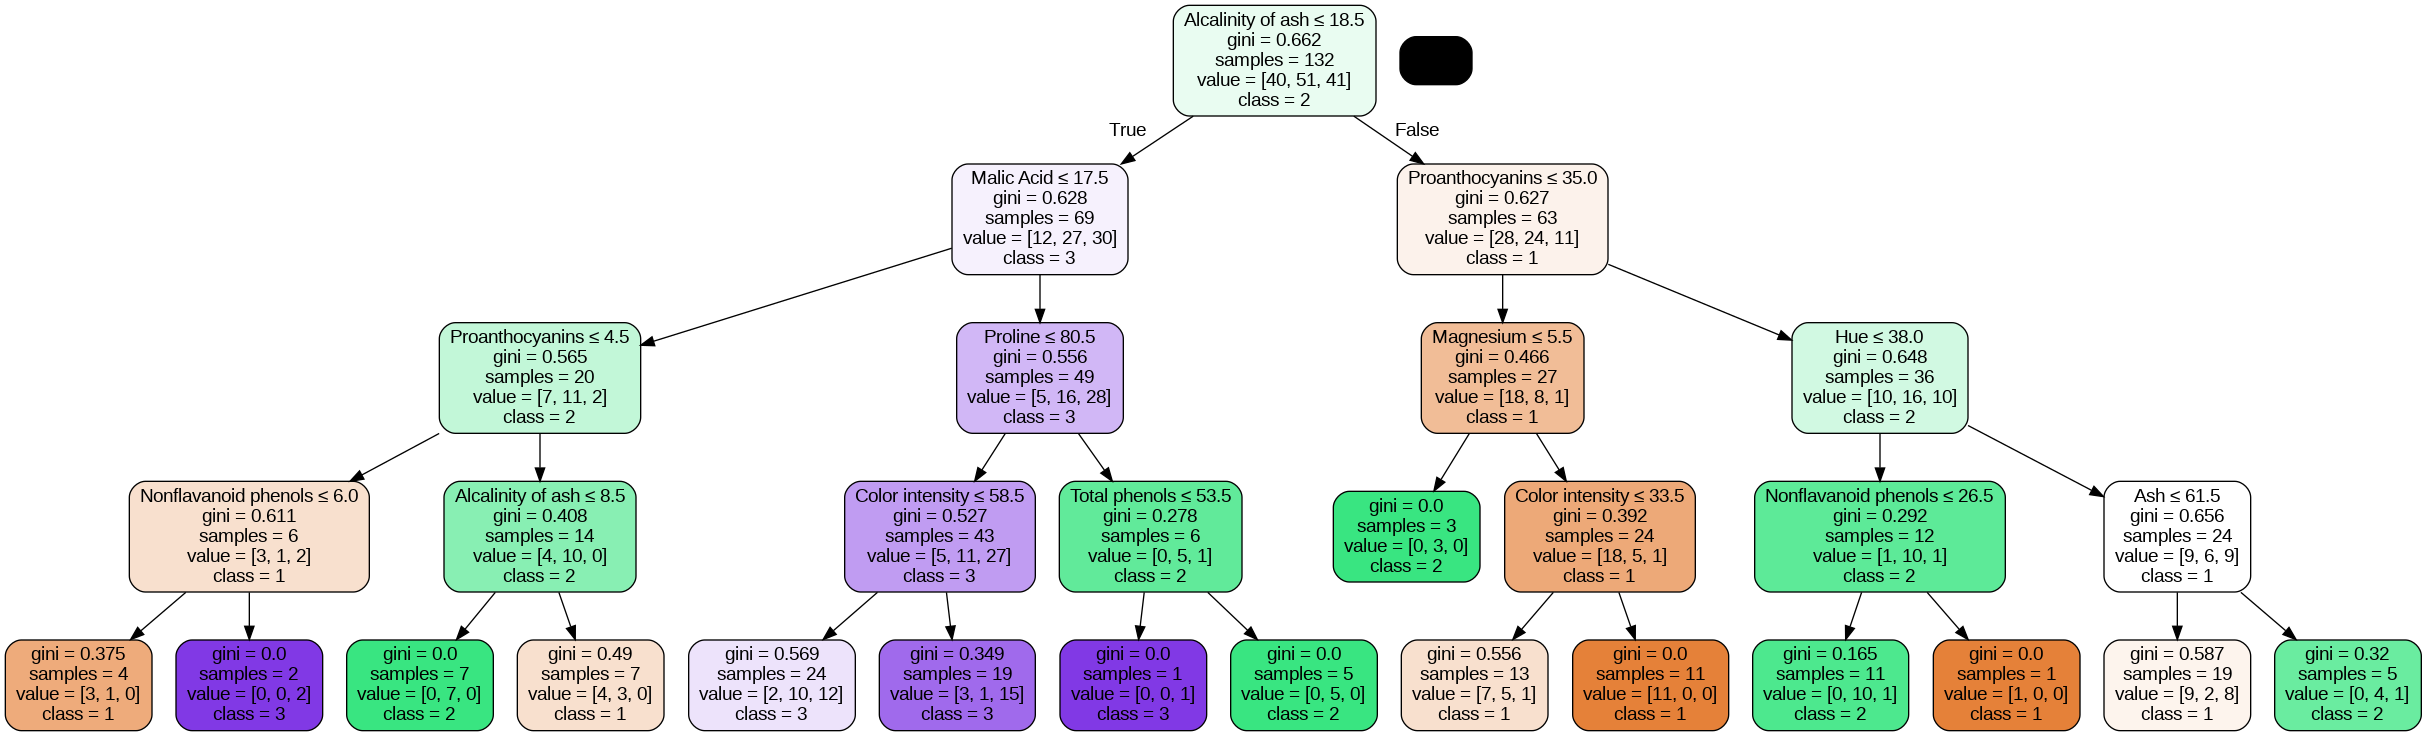

In [153]:
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(clf_gini,out_file=dot_data,filled=True,rounded=True,special_characters=True,feature_names=X.columns,class_names=['1','2','3'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes.png')

Image(graph.create_png())


In [135]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.29      0.22      0.25        18
           2       0.25      0.15      0.19        20
           3       0.21      0.57      0.31         7

    accuracy                           0.24        45
   macro avg       0.25      0.31      0.25        45
weighted avg       0.26      0.24      0.23        45



### Entropy

In [142]:

clf_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42,max_depth=4)
clf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)

In [143]:
y_pred = clf_entropy.predict(X_test)

In [144]:
print('Gini index:', metrics.accuracy_score(y_test, clf_gini.predict(X_test)))
print('Entropy:', metrics.accuracy_score(y_test, clf_entropy.predict(X_test)))



Gini index: 0.24444444444444444
Entropy: 0.24444444444444444


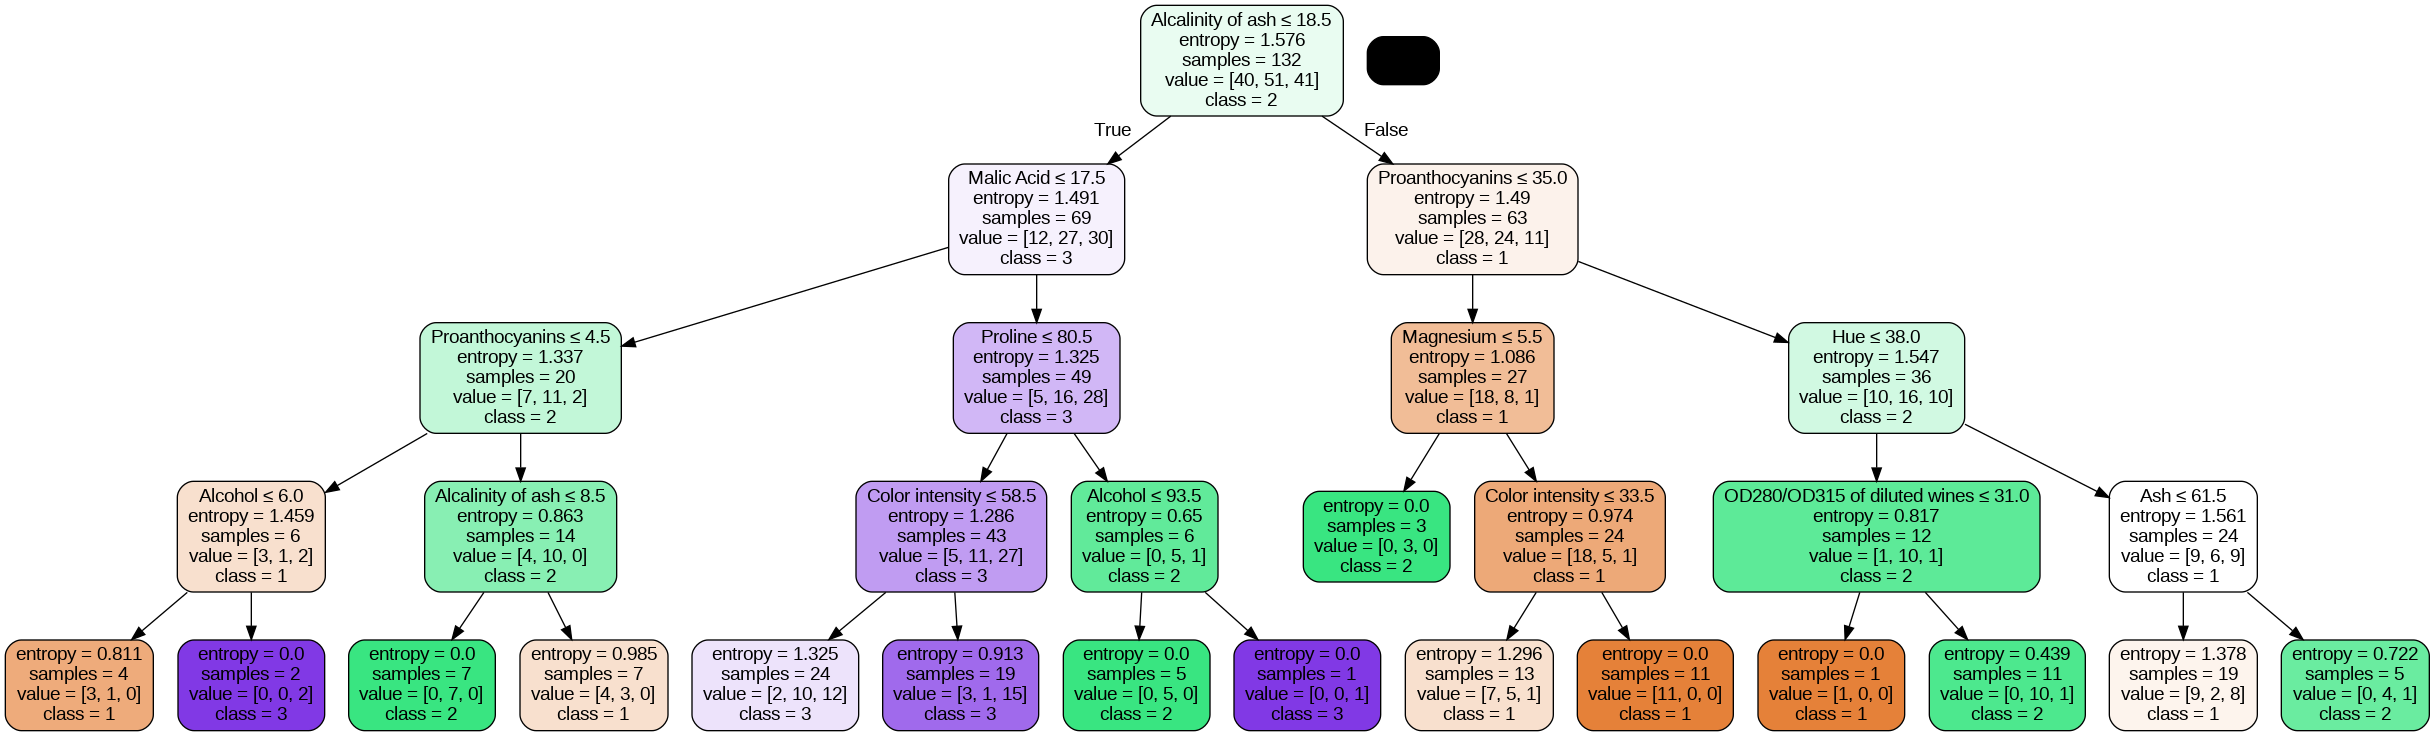

In [154]:
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

dot_data1 = StringIO()
export_graphviz(clf_entropy,out_file=dot_data1,filled=True,rounded=True,special_characters=True,feature_names=X.columns,class_names=['1','2','3'])

graph = pydotplus.graph_from_dot_data(dot_data1.getvalue())
graph.write_png('entropy.png')

Image(graph.create_png())


###Explain Demonstrate how decision trees deal with missing values




In [145]:
diabetes_df['a'].fillna(diabetes_df['alcohol'].mean(), inplace=True)



KeyError: ignored

### Task 3: Evaluate the classifiers with suitable performance metrices.

In [150]:
print('Gini index after dealing with missing values:', metrics.accuracy_score(y_test, clf_gini.predict(X_test)))
print('Entropy after dealing with missing values:', metrics.accuracy_score(y_test, clf_entropy.predict(X_test)))



Gini index after dealing with missing values: 0.24444444444444444
Entropy after dealing with missing values: 0.24444444444444444


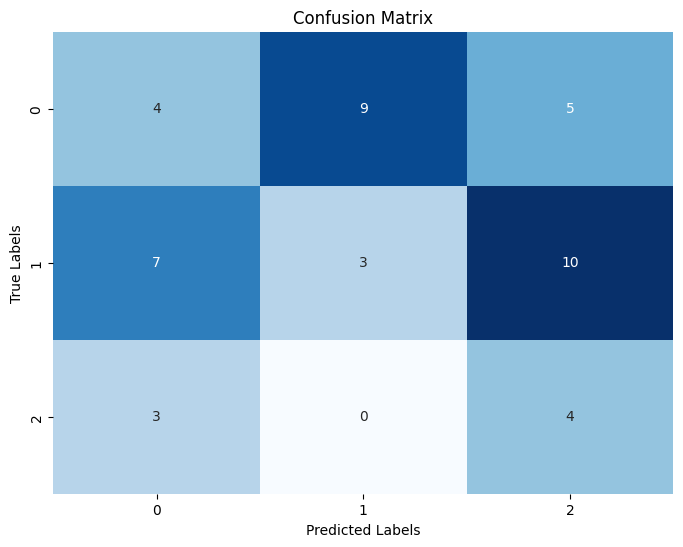



Entropy Critera


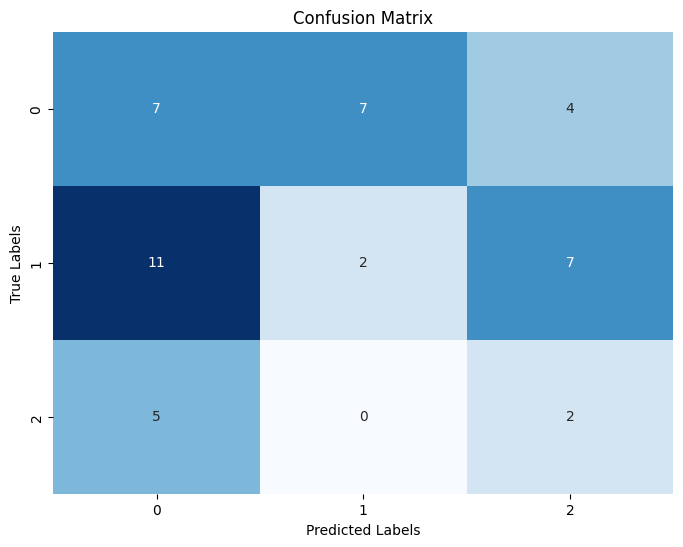

In [155]:
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(confusion_matrix):
    plt.figure(figsize=(8, 6))
    ax = sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
    ax.set_xlabel('Predicted Labels')
    ax.set_ylabel('True Labels')

    plt.title('Confusion Matrix')
    plt.show()
conf_mat = confusion_matrix(y_test, clf_gini.predict(X_test))

plot_confusion_matrix(conf_mat)


print("\n")
print("Entropy Critera")

conf_mat = confusion_matrix(y_test, clf_entropy.predict(X_test))

plot_confusion_matrix(conf_mat)

In [156]:
print(classification_report(y_test, clf_gini.predict(X_test)))
print(classification_report(y_test, clf_entropy.predict(X_test)))


              precision    recall  f1-score   support

           1       0.29      0.22      0.25        18
           2       0.25      0.15      0.19        20
           3       0.21      0.57      0.31         7

    accuracy                           0.24        45
   macro avg       0.25      0.31      0.25        45
weighted avg       0.26      0.24      0.23        45

              precision    recall  f1-score   support

           1       0.30      0.39      0.34        18
           2       0.22      0.10      0.14        20
           3       0.15      0.29      0.20         7

    accuracy                           0.24        45
   macro avg       0.23      0.26      0.23        45
weighted avg       0.24      0.24      0.23        45



### Task 4: Demonstrate how pruning can be applied to overcome overfitting of decision tree classifiers.

In [152]:
clf_pruned = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)
clf_pruned.fit(X_train, y_train)

# Evaluate the pruned classifierx
print('Pruned classifier accuracy:', metrics.accuracy_score(y_test, clf_pruned.predict(X_test)))

Pruned classifier accuracy: 0.3111111111111111


### Task 5: Visualize decision trees.

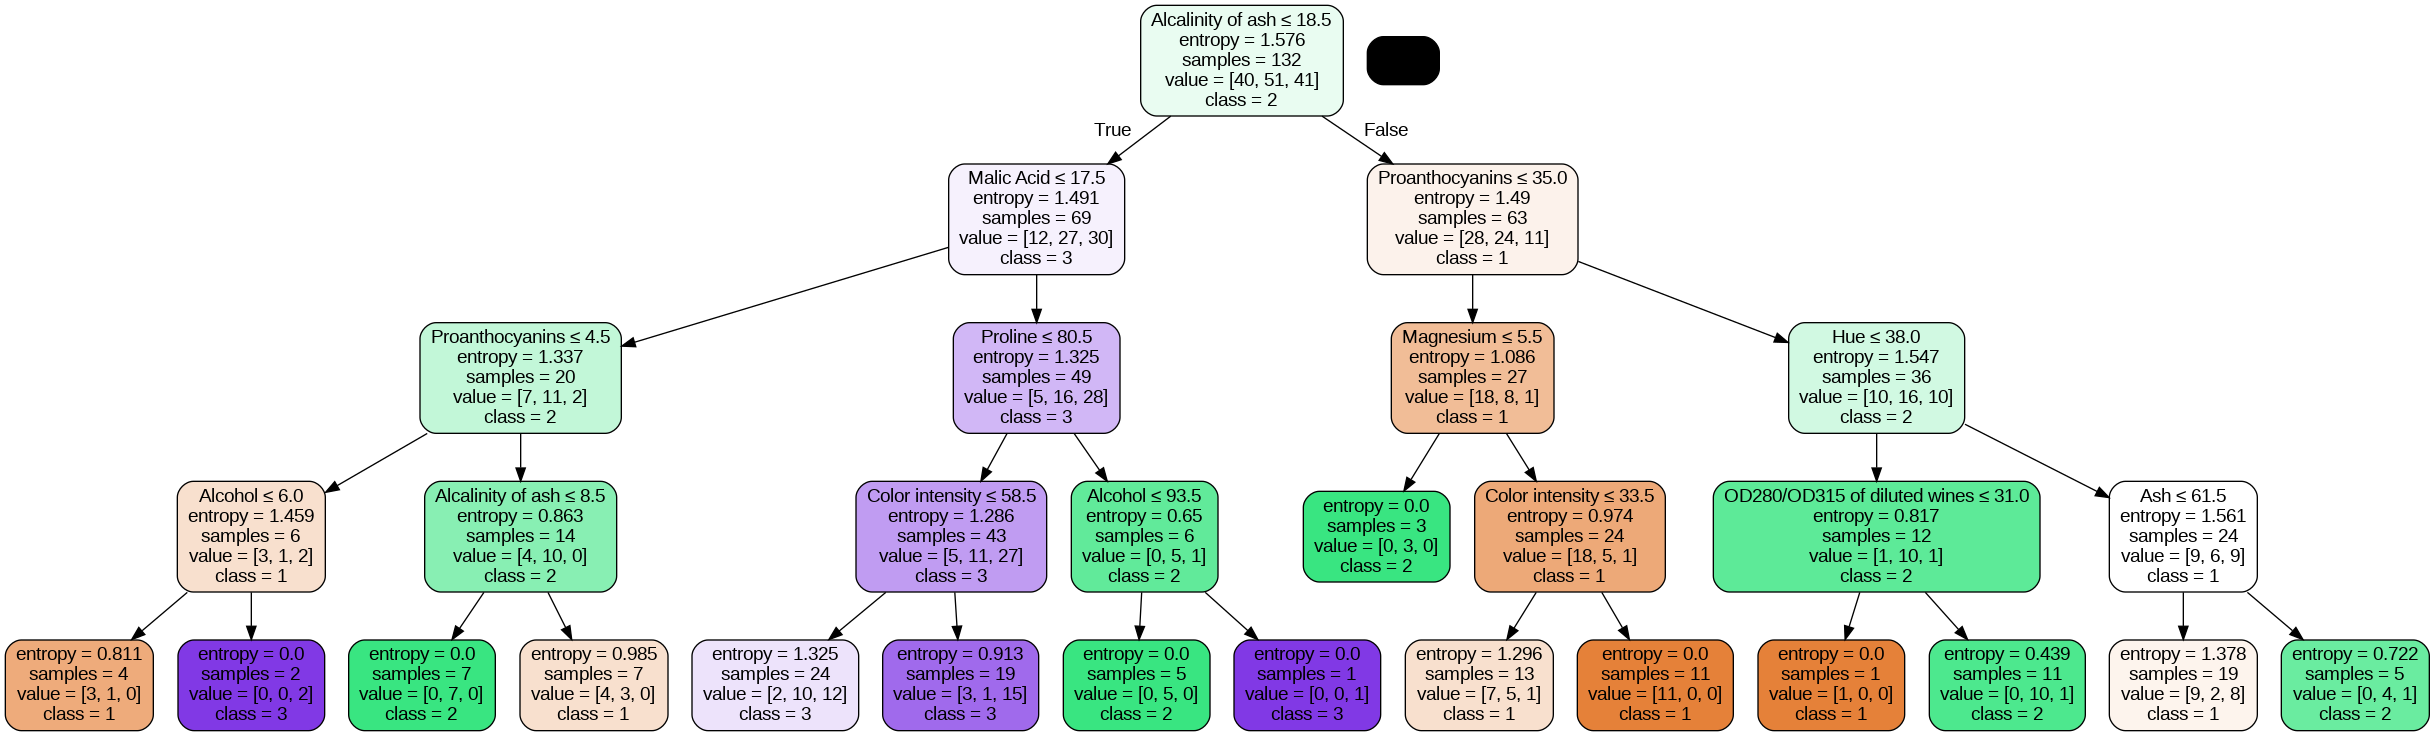

In [149]:
# from sklearn.tree import export_graphviz
# from IPython.display import Image

# dot_data = export_graphviz(clf_gini, out_file='gini.dot', filled=True, rounded=True, special_characters=True, feature_names=X_train.columns, class_names=['1','2','3'])
# graph = graphviz.Source(dot_data)
# Image(graph.create_png())


# dot_data = export_graphviz(clf_entropy, out_file='entropy.dot', filled=True, rounded=True, special_characters=True, feature_names=X_train.columns, class_names=['1','2','3'])
# graph = graphviz.Source(dot_data)
# Image(graph.create_png())

from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

gini_data = StringIO()
export_graphviz(clf_gini,out_file=gini_data,filled=True,rounded=True,special_characters=True,feature_names=X.columns,class_names=['1','2','3'])

graph = pydotplus.graph_from_dot_data(gini_data.getvalue())
graph.write_png('gini_visualized.png')

Image(graph.create_png())


from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

entropy_data = StringIO()
export_graphviz(clf_entropy,out_file=entropy_data,filled=True,rounded=True,special_characters=True,feature_names=X.columns,class_names=['1','2','3'])

graph = pydotplus.graph_from_dot_data(entropy_data.getvalue())
graph.write_png('entrophy_visualized.png')

Image(graph.create_png())